<a href="https://colab.research.google.com/github/Unaixafaheem/Artificial-Intelligence/blob/main/Task_4_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install seaborn if not already available (Colab usually has it)
!pip install seaborn --quiet


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)

sns.set(style="whitegrid")


In [3]:
iris = load_iris(as_frame=True)
X_iris = iris.data
y_iris = iris.target
target_names = iris.target_names

df_iris = X_iris.copy()
df_iris["species"] = y_iris

print("Shape:", df_iris.shape)
df_iris.head()


Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


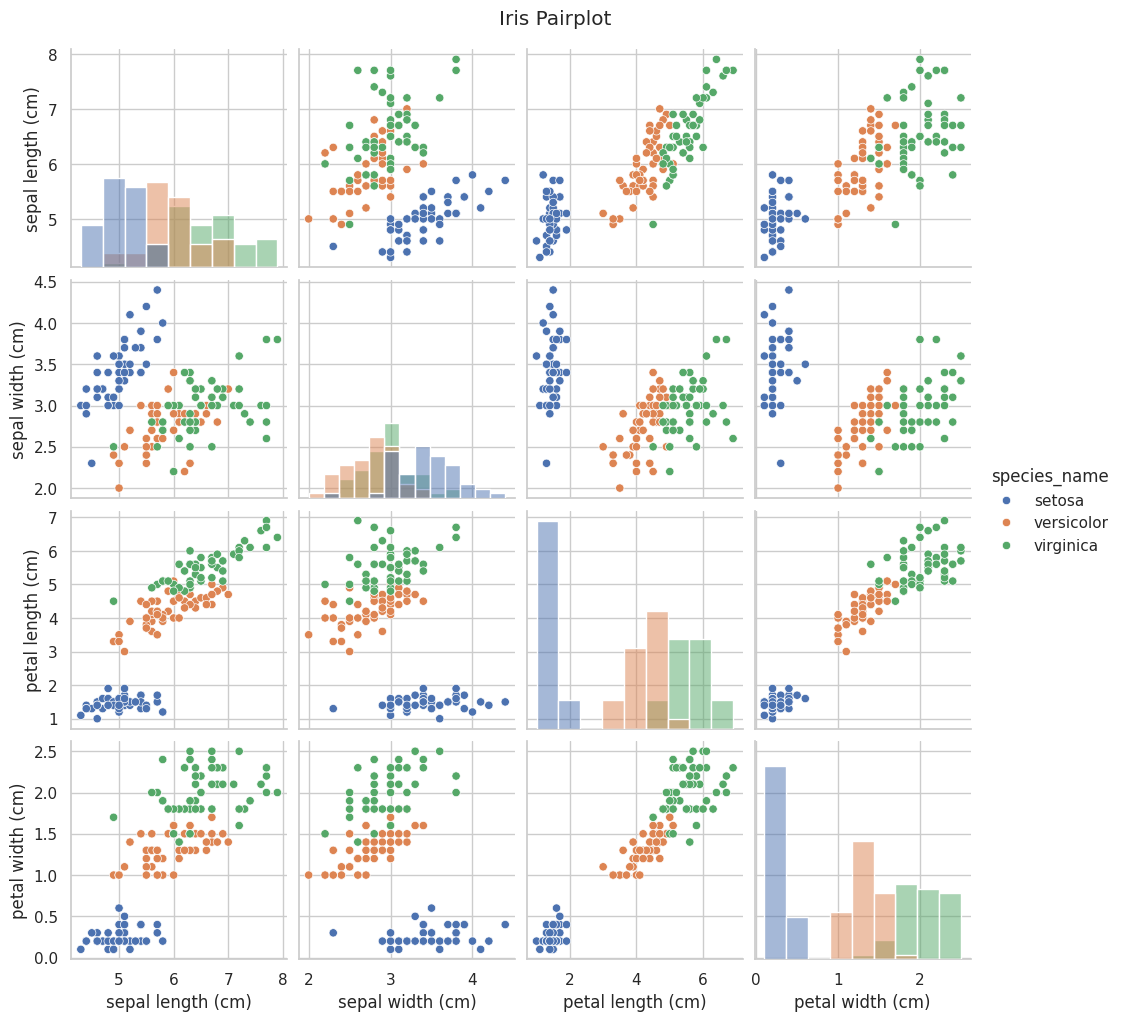

In [4]:
# Map numeric species to actual names for plotting
df_iris["species_name"] = df_iris["species"].map(lambda i: target_names[i])

sns.pairplot(
    df_iris,
    vars=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"],
    hue="species_name",
    diag_kind="hist"
)
plt.suptitle("Iris Pairplot", y=1.02)
plt.show()


In [5]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

print("Train shape:", X_train_i.shape)
print("Test shape:", X_test_i.shape)


Train shape: (120, 4)
Test shape: (30, 4)


In [6]:
scaler_clf = StandardScaler()
X_train_i_scaled = scaler_clf.fit_transform(X_train_i)
X_test_i_scaled = scaler_clf.transform(X_test_i)

clf_models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "SVM (RBF)": SVC(kernel="rbf", probability=True),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

clf_results = []

for name, model in clf_models.items():
    model.fit(X_train_i_scaled, y_train_i)
    y_pred = model.predict(X_test_i_scaled)

    acc = accuracy_score(y_test_i, y_pred)
    clf_results.append({
        "Model": name,
        "Accuracy": acc
    })

clf_results_df = pd.DataFrame(clf_results).sort_values(by="Accuracy", ascending=False)
clf_results_df


,Model,Accuracy
1,SVM (RBF),0.966667
0,Logistic Regression,0.933333
2,KNN (k=5),0.933333
3,Decision Tree,0.933333


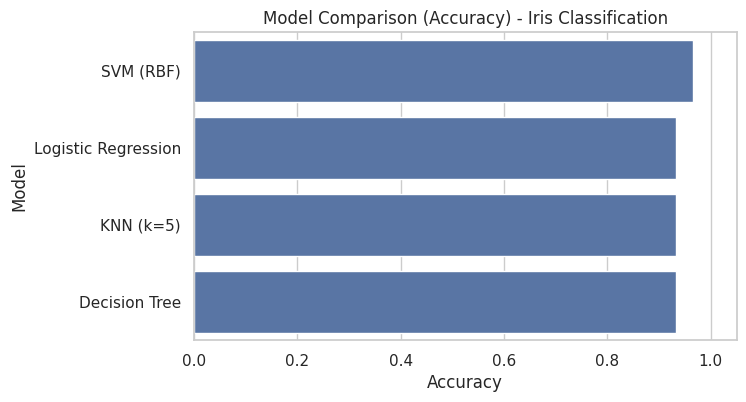

In [7]:
plt.figure(figsize=(7, 4))
sns.barplot(x="Accuracy", y="Model", data=clf_results_df, orient="h")
plt.title("Model Comparison (Accuracy) - Iris Classification")
plt.xlim(0, 1.05)
plt.show()


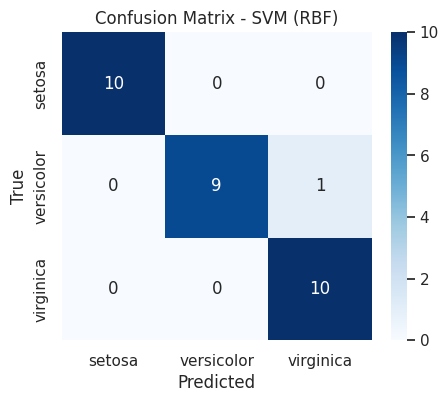

Classification Report for SVM (RBF):

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [8]:
best_clf_name = clf_results_df.iloc[0]["Model"]
best_clf = clf_models[best_clf_name]

y_pred_best_i = best_clf.predict(X_test_i_scaled)
cm = confusion_matrix(y_test_i, y_pred_best_i)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - {best_clf_name}")
plt.show()

print(f"Classification Report for {best_clf_name}:\n")
print(classification_report(y_test_i, y_pred_best_i, target_names=target_names))


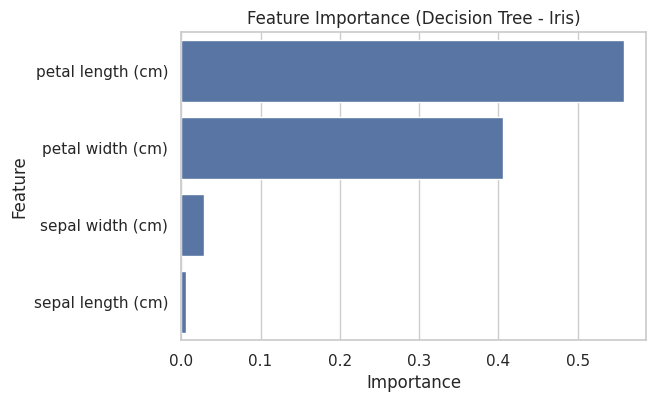

,Feature,Importance
2,petal length (cm),0.558568
3,petal width (cm),0.406015
1,sepal width (cm),0.029167
0,sepal length (cm),0.006250


In [9]:
dt_clf = clf_models["Decision Tree"]
importances_clf = dt_clf.feature_importances_

feat_imp_iris_df = pd.DataFrame({
    "Feature": X_iris.columns,
    "Importance": importances_clf
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=feat_imp_iris_df)
plt.title("Feature Importance (Decision Tree - Iris)")
plt.show()

feat_imp_iris_df


In [10]:
# Example: [sepal length, sepal width, petal length, petal width]
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # like setosa
new_flower_scaled = scaler_clf.transform(new_flower)

pred_class = best_clf.predict(new_flower_scaled)[0]
pred_name = target_names[pred_class]

print(f"Predicted species: {pred_name}")


Predicted species: setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
